## 1. Importing the Required Libaries

In [28]:

"""Ignoring the Basic Library Warnings and other notebook formatting instructions"""

import warnings
warnings.filterwarnings('ignore')
%pylab inline

"""Importing the Libraries for the Project"""
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import os
import pandas as pd
import glob
import scipy
import sys
import IPython.display as ipd


Populating the interactive namespace from numpy and matplotlib


## 2. Taking the Input Data

In [29]:
mylist=os.listdir('Savee_Data/')
type(mylist)

list

In [30]:
print(mylist)

['a01.wav', 'a02.wav', 'a03.wav', 'a04.wav', 'a05.wav', 'a06.wav', 'a07.wav', 'a08.wav', 'a09.wav', 'a10.wav', 'a11.wav', 'a12.wav', 'a13.wav', 'a14.wav', 'a15.wav', 'd01.wav', 'd02.wav', 'd03.wav', 'd04.wav', 'd05.wav', 'd06.wav', 'd07.wav', 'd08.wav', 'd09.wav', 'd10.wav', 'd11.wav', 'd12.wav', 'd13.wav', 'd14.wav', 'd15.wav', 'f01.wav', 'f02.wav', 'f03.wav', 'f04.wav', 'f05.wav', 'f06.wav', 'f07.wav', 'f08.wav', 'f09.wav', 'f10.wav', 'f11.wav', 'f12.wav', 'f13.wav', 'f14.wav', 'f15.wav', 'h01.wav', 'h02.wav', 'h03.wav', 'h04.wav', 'h05.wav', 'h06.wav', 'h07.wav', 'h08.wav', 'h09.wav', 'h10.wav', 'h11.wav', 'h12.wav', 'h13.wav', 'h14.wav', 'h15.wav', 'n01.wav', 'n02.wav', 'n03.wav', 'n04.wav', 'n05.wav', 'n06.wav', 'n07.wav', 'n08.wav', 'n09.wav', 'n10.wav', 'n11.wav', 'n12.wav', 'n13.wav', 'n14.wav', 'n15.wav', 'n16.wav', 'n17.wav', 'n18.wav', 'n19.wav', 'n20.wav', 'n21.wav', 'n22.wav', 'n23.wav', 'n24.wav', 'n25.wav', 'n26.wav', 'n27.wav', 'n28.wav', 'n29.wav', 'n30.wav', 'sa01.wav

## 3. Plotting the audio file's waveform and its spectogram

In [31]:
data, sampling_rate = librosa.load('Savee_data/a01.wav')
plt.figure(figsize=(15,5))

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

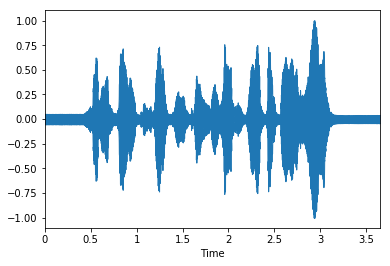

In [32]:
librosa.display.waveplot(data, sr=sampling_rate)

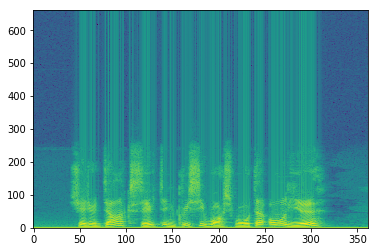

In [33]:
sr,x = scipy.io.wavfile.read('Savee_data/a01.wav')

## Parameters: 10ms step, 30ms window
nstep = int(sr * 0.01)
nwin  = int(sr * 0.03)
nfft = nwin

window = np.hamming(nwin)

## will take windows x[n1:n2].  generate
## and loop over n2 such that all frames
## fit within the waveform
nn = range(nwin, len(x), nstep)

X = np.zeros( (len(nn), nfft//2) )

for i,n in enumerate(nn):
    xseg = x[n-nwin:n]
    z = np.fft.fft(window * xseg, nfft)
    X[i,:] = np.log(np.abs(z[:nfft//2]))

plt.imshow(X.T, interpolation='nearest',
    origin='lower',
    aspect='auto')

plt.show()

## 4. Trimming the Silence in Audio

In [34]:
aa,bb = librosa.effects.trim(data, top_db=30)
aa,bb

(array([0.03537439, 0.05184603, 0.04569934, ..., 0.04182833, 0.04050382,
        0.04224475], dtype=float32), array([    0, 80434]))

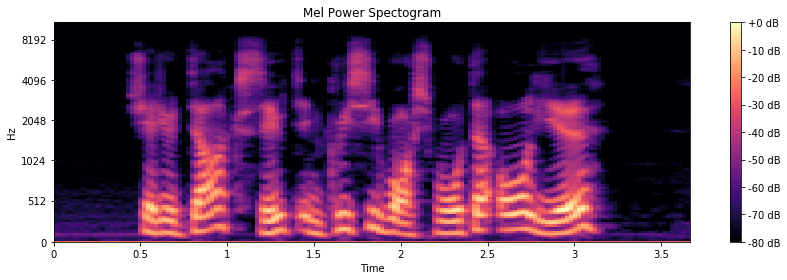

In [35]:
S=librosa.feature.melspectrogram(aa, sr=sampling_rate, n_mels=128)

#converting to log scale (dB). We'll use the peak power (max) as reference.

log_S = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(12,4))
librosa.display.specshow(log_S, sr=sampling_rate, x_axis='time',y_axis='mel')
plt.title('Mel Power Spectogram')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

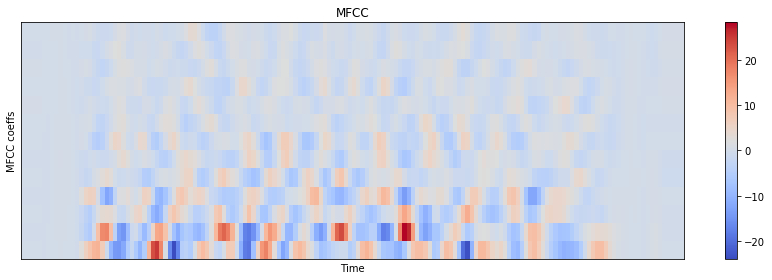

In [36]:
# Plotting MFCC
mfcc= librosa.feature.mfcc(S=log_S, n_mfcc=13)
# Let's pad on the first and second deltas while we're at it
delta2_mfcc = librosa.feature.delta(mfcc, order=2)

plt.figure(figsize=(12, 4))
librosa.display.specshow(delta2_mfcc)
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()

In [37]:
# Original Sound
ipd.Audio(data, rate=sampling_rate)

## 4. Creating the Labels

In [38]:
feeling_list=[]

In [39]:
for item in mylist:
    if item[0]=='a':
        feeling_list.append('male_angry')
    elif item[0]=='f':
        feeling_list.append('male_fear')
    elif item[0]=='d':
        feeling_list.append('male_disgust')
    elif item[0]=='h':
        feeling_list.append('male_happiness')
    elif item[0]=='s' and item[1]=='a':
        feeling_list.append('male_sadness')
    elif item[0]=='s'and item[1]=='u':
        feeling_list.append('male_surprise')
    elif item[0]=='n':
        feeling_list.append('male_neutral')

In [40]:
print(feeling_list)

['male_angry', 'male_angry', 'male_angry', 'male_angry', 'male_angry', 'male_angry', 'male_angry', 'male_angry', 'male_angry', 'male_angry', 'male_angry', 'male_angry', 'male_angry', 'male_angry', 'male_angry', 'male_disgust', 'male_disgust', 'male_disgust', 'male_disgust', 'male_disgust', 'male_disgust', 'male_disgust', 'male_disgust', 'male_disgust', 'male_disgust', 'male_disgust', 'male_disgust', 'male_disgust', 'male_disgust', 'male_disgust', 'male_fear', 'male_fear', 'male_fear', 'male_fear', 'male_fear', 'male_fear', 'male_fear', 'male_fear', 'male_fear', 'male_fear', 'male_fear', 'male_fear', 'male_fear', 'male_fear', 'male_fear', 'male_happiness', 'male_happiness', 'male_happiness', 'male_happiness', 'male_happiness', 'male_happiness', 'male_happiness', 'male_happiness', 'male_happiness', 'male_happiness', 'male_happiness', 'male_happiness', 'male_happiness', 'male_happiness', 'male_happiness', 'male_neutral', 'male_neutral', 'male_neutral', 'male_neutral', 'male_neutral', 'mal